# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [3]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(20)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


transformar gender, marital status, credit score

In [5]:
df.dtypes

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [6]:
df["Income"] = (
    df["Income"]
    .astype(str)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)


In [7]:
df["Income"].dtypes


dtype('float64')

In [8]:
print(df['Income'])

0      50000.00
1     100000.00
2      75000.00
3     125000.00
4     100000.00
         ...   
159    27500.00
160    47500.00
161    62500.00
162    87500.00
163    77500.00
Name: Income, Length: 164, dtype: float64


In [9]:
label_encoder = LabelEncoder()
df['Genero_encoded'] = label_encoder.fit_transform(df['Gender'])

df['Estado_Civil'] = label_encoder.fit_transform(df['Marital Status'])

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,Genero_encoded,Estado_Civil
0,25.00,Female,50000.00,Bachelor's Degree,Single,0,Rented,High,0,1
1,30.00,Male,100000.00,Master's Degree,Married,2,Owned,High,1,0
2,35.00,Female,75000.00,Doctorate,Married,1,Owned,High,0,0
3,40.00,Male,125000.00,High School Diploma,Single,0,Owned,High,1,1
4,45.00,Female,100000.00,Bachelor's Degree,Married,3,Owned,High,0,0
5,50.00,Male,150000.00,Master's Degree,Married,0,Owned,High,1,0
6,26.00,Female,40000.00,Associate's Degree,Single,0,Rented,Average,0,1
7,31.00,Male,60000.00,Bachelor's Degree,Single,0,Rented,Average,1,1
8,NaN,Female,80000.00,Master's Degree,Married,2,Owned,High,0,0
9,NaN,Male,105000.00,Doctorate,Single,0,Owned,High,1,1


In [10]:
df = pd.get_dummies(df, columns=['Credit Score'], prefix='Credit Score', drop_first=True)


In [11]:
print(df.columns)
print(df)

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Genero_encoded',
       'Estado_Civil', 'Credit Score_High', 'Credit Score_Low'],
      dtype='object')
      Age  Gender    Income            Education Marital Status  \
0   25.00  Female  50000.00    Bachelor's Degree         Single   
1   30.00    Male 100000.00      Master's Degree        Married   
2   35.00  Female  75000.00            Doctorate        Married   
3   40.00    Male 125000.00  High School Diploma         Single   
4   45.00  Female 100000.00    Bachelor's Degree        Married   
..    ...     ...       ...                  ...            ...   
159 29.00  Female  27500.00  High School Diploma         Single   
160 34.00    Male  47500.00   Associate's Degree         Single   
161 39.00  Female  62500.00    Bachelor's Degree        Married   
162 44.00    Male  87500.00      Master's Degree         Single   
163 49.00  Female  77500.00            Doctora

In [12]:
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)
print(df)

      Age  Gender    Income            Education Marital Status  \
0   25.00  Female  50000.00    Bachelor's Degree         Single   
1   30.00    Male 100000.00      Master's Degree        Married   
2   35.00  Female  75000.00            Doctorate        Married   
3   40.00    Male 125000.00  High School Diploma         Single   
4   45.00  Female 100000.00    Bachelor's Degree        Married   
..    ...     ...       ...                  ...            ...   
159 29.00  Female  27500.00  High School Diploma         Single   
160 34.00    Male  47500.00   Associate's Degree         Single   
161 39.00  Female  62500.00    Bachelor's Degree        Married   
162 44.00    Male  87500.00      Master's Degree         Single   
163 49.00  Female  77500.00            Doctorate        Married   

     Number of Children Home Ownership  Genero_encoded  Estado_Civil  \
0                     0         Rented               0             1   
1                     2          Owned             

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [13]:
df.isnull().sum()

Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Genero_encoded         0
Estado_Civil           0
Credit Score_High      0
Credit Score_Low       0
dtype: int64

In [14]:
df.dropna(subset=['Age'], inplace=True)

In [15]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Genero_encoded        0
Estado_Civil          0
Credit Score_High     0
Credit Score_Low      0
dtype: int64

Descidi por excluir, pois acredito que baixa quantidade de dados faltantes não vá prejudicar o modelo.

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [16]:
df['Home Ownership'].unique()


array(['Rented', 'Owned'], dtype=object)

In [17]:
print(df)

      Age  Gender    Income            Education Marital Status  \
0   25.00  Female  50000.00    Bachelor's Degree         Single   
1   30.00    Male 100000.00      Master's Degree        Married   
2   35.00  Female  75000.00            Doctorate        Married   
3   40.00    Male 125000.00  High School Diploma         Single   
4   45.00  Female 100000.00    Bachelor's Degree        Married   
..    ...     ...       ...                  ...            ...   
159 29.00  Female  27500.00  High School Diploma         Single   
160 34.00    Male  47500.00   Associate's Degree         Single   
161 39.00  Female  62500.00    Bachelor's Degree        Married   
162 44.00    Male  87500.00      Master's Degree         Single   
163 49.00  Female  77500.00            Doctorate        Married   

     Number of Children Home Ownership  Genero_encoded  Estado_Civil  \
0                     0         Rented               0             1   
1                     2          Owned             

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [18]:
df.describe()

,Age,Income,Number of Children,Genero_encoded,Estado_Civil,Credit Score_High,Credit Score_Low
count,130.00,130.00,130.00,130.00,130.00,130.00,130.00
mean,37.51,84288.46,0.66,0.48,0.48,0.68,0.08
std,8.50,33063.94,0.90,0.50,0.50,0.47,0.28
min,25.00,25000.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,58125.00,0.00,0.00,0.00,0.00,0.00
50%,36.00,82500.00,0.00,0.00,0.00,1.00,0.00
75%,45.00,105000.00,1.00,1.00,1.00,1.00,0.00
max,53.00,162500.00,3.00,1.00,1.00,1.00,1.00


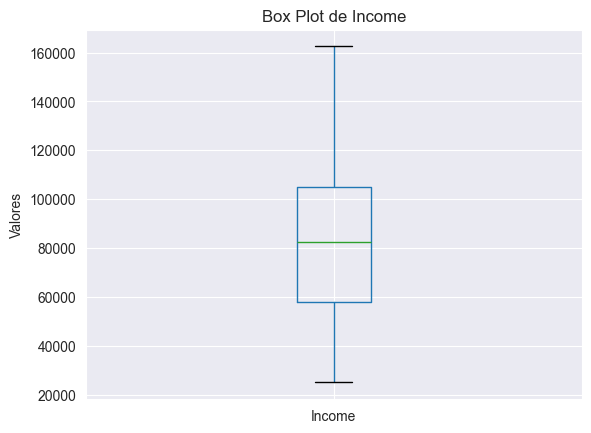

In [19]:
df.boxplot(column='Income')
plt.title('Box Plot de Income')
plt.ylabel('Valores')
plt.show()

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

C:\Users\pedro\AppData\Local\Temp\ipykernel_4660\3199725180.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


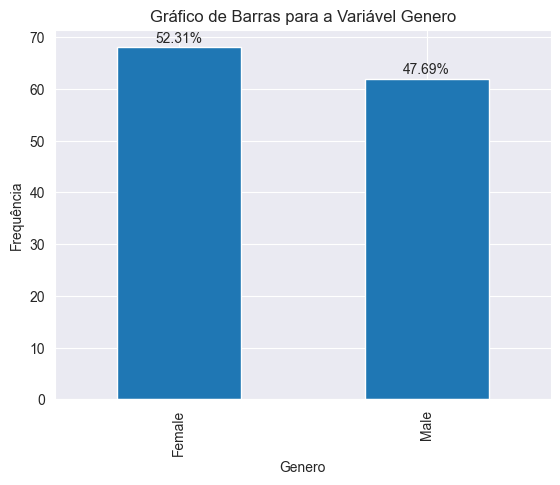

In [20]:
contagem = df['Gender'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Genero')
plt.xlabel('Genero')
plt.ylabel('Frequência')

plt.show()

A quantidade de homens e mulheres do nosso dados estão quase iguais

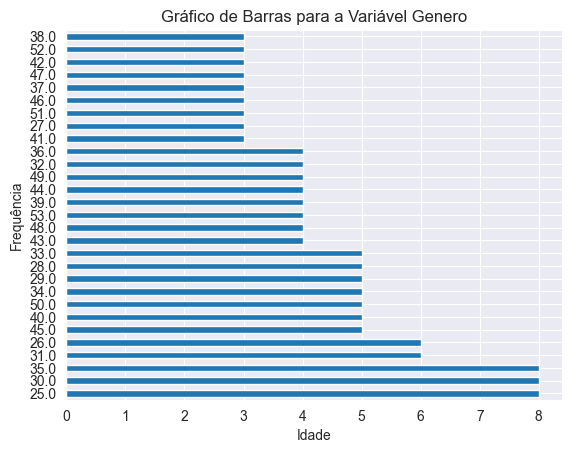

In [21]:
contagem = df['Age'].value_counts()

ax = contagem.plot(kind='barh')
plt.title('Gráfico de Barras para a Variável Genero')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.show()

A maior quantidade de clientes se encontra na faixa etária de 25, 30, 35 anos. E as menores se encontram na faixa etária de 37, 38, 41, 42, 46, 41, 47, 51, 52 anos

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

Não encontrei nenhuma coluna com outliers

In [ ]:
#seu código aqui

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [22]:
fig = px.histogram(df, x='Age', color='Marital Status', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Idade e Estado Civil',
                  xaxis_title='Idade',
                  yaxis_title='Estado Civil',
                  legend_title='Estado Civil')
fig.show()

podemos notar que em nossa base de dados os clientes entre 25 e 44 anos são em maioria solteiros, já clientes entre 45 a 54 anos são todos casados.

In [23]:
fig = px.histogram(df, x='Education', color='Credit Score_High', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Nivel de Educação e Score',
                  xaxis_title='Nivel de Educação',
                  yaxis_title='Score',
                  legend_title='Score')
fig.show()

In [24]:
fig = px.histogram(df, x='Education', color='Credit Score_Low', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Nivel de Educação e Score',
                  xaxis_title='Nivel de Educação',
                  yaxis_title='Score',
                  legend_title='Score')
fig.show()

Podemos notar claramente que o nivel educacional dos clientes tem forte relação com o Score alto

In [25]:
fig = px.histogram(df, x='Income', color='Age', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Salario e Idade',
                  xaxis_title='Salario',
                  yaxis_title='Contagem',
                  legend_title='Idade')
fig.show()

Podemos notar que a idade mais avançada reflete sim em maiores salarios

In [26]:
fig = px.histogram(df, x='Income', color='Credit Score_High', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Salario e Score',
                  xaxis_title='Salario',
                  yaxis_title='Contagem',
                  legend_title='Score')
fig.show()

In [27]:
fig = px.histogram(df, x='Income', color='Credit Score_Low', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Salario e Score',
                  xaxis_title='Salario',
                  yaxis_title='Contagem',
                  legend_title='Score')
fig.show()

Maiores salarios podem influenciar possitivamente no Credit Score

In [28]:
fig = px.histogram(df, x='Home Ownership', color='Credit Score_High', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Casa propria e Score',
                  xaxis_title='Casa Propria',
                  yaxis_title='Contagem',
                  legend_title='Score')
fig.show()

In [29]:
fig = px.histogram(df, x='Home Ownership', color='Credit Score_Low', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Casa propria e Score',
                  xaxis_title='Casa Propria',
                  yaxis_title='Contagem',
                  legend_title='Score')
fig.show()

Casa propria pode influenciar em um maior score

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

In [30]:
fig = px.histogram(df, x='Income', color='Gender', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Churn e Gênero',
                  xaxis_title='Salario',
                  yaxis_title='Contagem',
                  legend_title='Gênero')
fig.show()

Podemos notar que os salarios mais elevados são recebidos pelo genero masculino

In [31]:
fig = px.histogram(df, x='Gender', color='Credit Score_High', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Genero e Score',
                  xaxis_title='Genero',
                  yaxis_title='Contagem',
                  legend_title='Score')
fig.show()

In [32]:
fig = px.histogram(df, x='Gender', color='Credit Score_Low', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Genero e Score',
                  xaxis_title='Genero',
                  yaxis_title='Contagem',
                  legend_title='Score')
fig.show()

Em nossa base de dados notamos que o genero masculino tem um Score mais elevado

In [33]:
fig = px.histogram(df, x='Income', color='Education', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Churn e Gênero',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Gênero')
fig.show()

Apesar da maioria que recebe os maiores salarios terem um nivel educional maior podemos notar uma quantide consideravel de clientes que tem um nivel educacional menor mas mesmo assim recebe um salario elevado.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [34]:
df.select_dtypes(include=['number']).corr()

,Age,Income,Number of Children,Genero_encoded,Estado_Civil,Credit Score_High,Credit Score_Low
Age,1.00,0.69,0.08,0.23,-0.51,0.70,-0.34
Income,0.69,1.00,0.11,0.49,-0.47,0.73,-0.48
Number of Children,0.08,0.11,1.00,-0.41,-0.70,0.45,-0.22
Genero_encoded,0.23,0.49,-0.41,1.00,0.26,0.10,-0.29
Estado_Civil,-0.51,-0.47,-0.70,0.26,1.00,-0.66,0.32
Credit Score_High,0.70,0.73,0.45,0.10,-0.66,1.00,-0.44
Credit Score_Low,-0.34,-0.48,-0.22,-0.29,0.32,-0.44,1.00


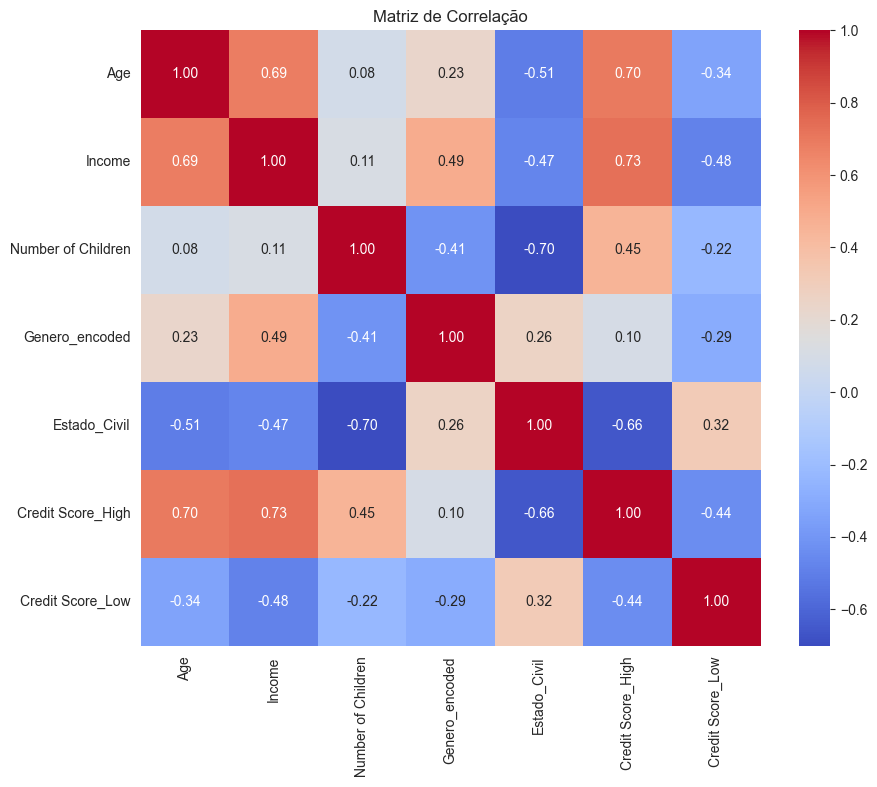

In [35]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

as variaveis que demostram maior correlação são: Age e Income, Credit Score_High e Age e Credit Score_High e Income. Elas são as variaveis que mais se aproximam de 1

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [36]:
df = df.drop(['Education'], axis=1)

Já havia relizado esse passo no inicio do tratamento

In [37]:
df = df.drop(['Gender'], axis=1)
print(df)

      Age    Income Marital Status  Number of Children Home Ownership  \
0   25.00  50000.00         Single                   0         Rented   
1   30.00 100000.00        Married                   2          Owned   
2   35.00  75000.00        Married                   1          Owned   
3   40.00 125000.00         Single                   0          Owned   
4   45.00 100000.00        Married                   3          Owned   
..    ...       ...            ...                 ...            ...   
159 29.00  27500.00         Single                   0         Rented   
160 34.00  47500.00         Single                   0         Rented   
161 39.00  62500.00        Married                   2          Owned   
162 44.00  87500.00         Single                   0          Owned   
163 49.00  77500.00        Married                   1          Owned   

     Genero_encoded  Estado_Civil  Credit Score_High  Credit Score_Low  
0                 0             1                 

In [38]:
df = df.drop(['Marital Status'], axis=1)

In [39]:
df = df.drop(['Home Ownership'],axis=1)

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [40]:
df.select_dtypes(include=['number']).corr()

,Age,Income,Number of Children,Genero_encoded,Estado_Civil,Credit Score_High,Credit Score_Low
Age,1.00,0.69,0.08,0.23,-0.51,0.70,-0.34
Income,0.69,1.00,0.11,0.49,-0.47,0.73,-0.48
Number of Children,0.08,0.11,1.00,-0.41,-0.70,0.45,-0.22
Genero_encoded,0.23,0.49,-0.41,1.00,0.26,0.10,-0.29
Estado_Civil,-0.51,-0.47,-0.70,0.26,1.00,-0.66,0.32
Credit Score_High,0.70,0.73,0.45,0.10,-0.66,1.00,-0.44
Credit Score_Low,-0.34,-0.48,-0.22,-0.29,0.32,-0.44,1.00


**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop('Credit Score_Low', axis=1)
y = df['Credit Score_Low']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
print("Tamanho de X_train:", X_train.shape)

Tamanho de X_train: (97, 6)


In [45]:
print("Tamanho de X_test:", X_test.shape)

Tamanho de X_test: (33, 6)


In [46]:
print("Tamanho de y_train:", y_train.shape)

Tamanho de y_train: (97,)


In [47]:
print("Tamanho de y_test:", y_test.shape)

Tamanho de y_test: (33,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

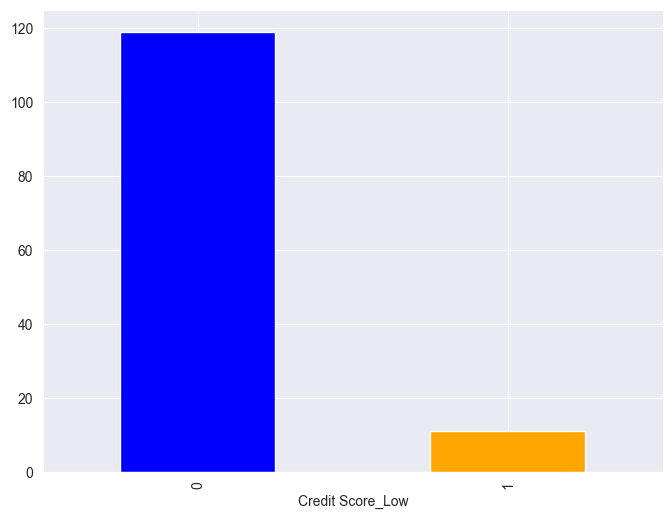

In [48]:
churn_counts = df['Credit Score_Low'].value_counts()
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['blue', 'orange'])
plt.show()

In [49]:
print((df['Credit Score_Low'].value_counts(normalize=True) * 100))

Credit Score_Low
0   91.54
1    8.46
Name: proportion, dtype: float64


Está mal balanceado já que temos disparidade de dados grandes

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())


Distribuição das classes após o balanceamento:
Credit Score_Low
0    89
1    89
Name: count, dtype: int64


In [57]:

X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)